In [1]:
import random
import functions
from sklearn import preprocessing
test_size = 80
test_list = random.sample(range(0, 500), test_size)
test_list.sort()

In [2]:
import csv

train_matrix = []
test_matrix = []
train_label = []
test_label = []

with open('dataset/Admission_Predict_data/Admission_Predict_Ver1.1.csv', encoding='utf-8') as f:
    reader = csv.reader(f)
    header = next(reader) # title
    index_test_list = 0
    index_row_list = 0
    for row in reader:
        train_row = []
        for i in range(1, len(row) - 1):
            train_row.append(float(row[i]))
        test_row = float(row[-1])
#         test_row = int(round(test_row * 10))
        
        if index_test_list < test_size and test_list[index_test_list] == index_row_list:
            test_matrix.append(train_row)
            test_label.append(test_row)
            index_test_list += 1
        else:
            train_matrix.append(train_row)
            train_label.append(test_row)
        index_row_list += 1
        

In [3]:
import numpy as np
x = np.array(train_matrix)
x = preprocessing.scale(x) # normalize
y = np.array(train_label)
x_test = np.array(test_matrix)
x_test = preprocessing.scale(x_test) # normalize

In [4]:
from sklearn.model_selection import KFold

def cross_val(data, label, model):
    kfold = KFold(n_splits = 5, shuffle = False)
    index = kfold.split(X = data, y = label)
    cross_val_error = []
    for train_index, test_index in index:
        model.fit(data[train_index], label[train_index]) # train
        y_pred = model.predict(data[test_index]) # predict
        error = functions.RSS(y_pred, label[test_index]) # error
        cross_val_error.append(error)
    exp_error = sum(cross_val_error)/len(cross_val_error)
    return exp_error

In [5]:
from sklearn.ensemble import AdaBoostRegressor
import datetime
estimators = np.linspace(1, 60, 60)
error = []
time = []
for i in estimators:
    starttime = datetime.datetime.now()
    clf = AdaBoostRegressor(n_estimators=int(i))
    error.append(cross_val(x, y, clf))
    endtime = datetime.datetime.now()
    time.append((endtime - starttime).microseconds)
print('AdaBoost min error:', min(error))
print('min time:', min(time))

AdaBoost min error: 0.3982471731179711
min time: 7738


In [6]:
from sklearn.metrics import r2_score
kfold = KFold(n_splits = 5, shuffle = False)
index = kfold.split(X = x, y = y)
clf = AdaBoostRegressor(n_estimators=int(estimators[error.index(min(error))]))
accuracy = []
for train_index, test_index in index:
    clf.fit(x[train_index], y[train_index]) # train
    y_pred = clf.predict(x[test_index]) # predict
    accuracy.append(r2_score(y_pred, y[test_index]))
print(sum(accuracy)/len(accuracy))

0.6917824678138575


min error: 0.3982471731179711
estimators when at min error: 10.0


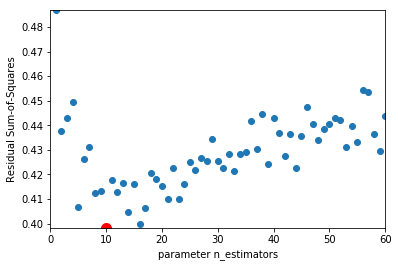

In [8]:
import matplotlib.pyplot as plt
import math
print('min error:', min(error))
print('estimators when at min error:', estimators[error.index(min(error))])
plt.scatter(estimators, error)
plt.xlim((0, 60))
plt.ylim((min(error), max(error)))
plt.scatter(estimators[error.index(min(error))], min(error), c = 'r', s = 100)
plt.xlabel('parameter n_estimators')
plt.ylabel('Residual Sum-of-Squares')
plt.show()

min time: 7738 microsecond
estimators when at min time: 1.0


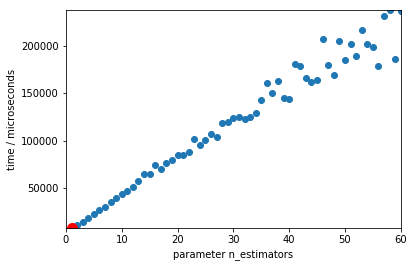

In [11]:
import matplotlib.pyplot as plt
import math
print('min time:', min(time), "microsecond")
print('estimators when at min time:', estimators[time.index(min(time))])
plt.scatter(estimators, time)
plt.xlim((0, 60))
plt.ylim((min(time), max(time)))
plt.scatter(estimators[time.index(min(time))], min(time), c = 'r', s = 100)
plt.xlabel('parameter n_estimators')
plt.ylabel('time / microseconds')
plt.show()